### **TC4029 - Ciencia y Analítica de Datos**

**Prof. María de la Paz Rico Fernández**

**Prof. Julio César Galindo López**
_ _ _

### **Data Analysis with Python (IBM)**
### Ivan Lee Cancino - A01793491
### **Module 3:** Exploratory Data Analysis

25-Oct-2022
_ _ _ 
_ _ _

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataframe location
path = '/Users/ivanlee/github-classroom/PosgradoMNA/actividades-de-aprendizaje-ivnlee/IBMPython_DataAnalysis/Modulo_2/clean_df.csv'

In [5]:
df = pd.read_csv(path, index_col=0)
df.head() 

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city_L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


### Analyzing Individual Feature Patterns Using Visualization

When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

In [6]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-L/100km      float64
price                float64
city_L/100km         float64
horsepower-binned     object
fuel-type-diesel       int64
fuel-type-gas          int64
std                    int64
turbo                  int64
dtype: object


### Question #1:
What is the data type of the column "peak-rpm"?

In [7]:
df['peak-rpm'].dtypes

dtype('float64')

We can calculate the correlation between variables of type "int64" or "float64" using the method "corr":

In [8]:
df.corr() 

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city_L/100km,fuel-type-diesel,fuel-type-gas,std,turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,...,0.075776,0.279719,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,...,0.217300,0.239544,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,...,0.371297,-0.360233,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,...,0.579688,-0.286035,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,...,0.614972,-0.245852,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,...,-0.086901,-0.309913,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,...,0.758001,-0.279350,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,...,0.822636,-0.256753,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,...,0.566786,-0.267338,-0.582121,0.559197,0.543154,0.554726,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,...,0.097598,-0.063720,-0.034079,0.047199,0.082267,0.036285,0.241033,-0.241033,-0.218190,0.218190


### Question #2: 
Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

In [9]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.566786
stroke,-0.055390,1.000000,0.187854,0.097598
compression-ratio,0.001250,0.187854,1.000000,-0.214392
horsepower,0.566786,0.097598,-0.214392,1.000000


### Continuous Numerical Variables

Continuous Numerical Variables:
Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.

**Positive Linear Relationship**

Find the scatterplot of "engine-size" and "price".

(0.0, 53183.76808222124)

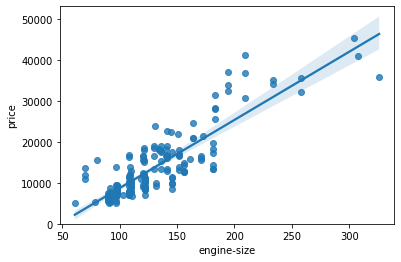

In [10]:
# Engine size as potential predictor variable of price
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.

In [11]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Find the scatterplot of "city-mpg" and "price".

<AxesSubplot:xlabel='city-mpg', ylabel='price'>

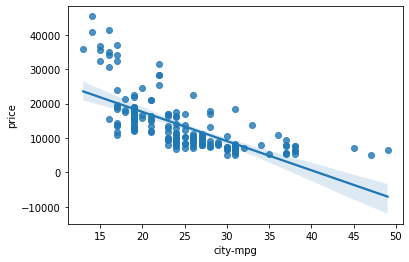

In [13]:
sns.regplot(x='city-mpg', y='price', data=df)

As city-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

We can examine the correlation between 'city-mpg' and 'price' and see it's approximately -0.686.

In [14]:
df[['city-mpg', 'price']].corr()

,city-mpg,price
city-mpg,1.000000,-0.686571
price,-0.686571,1.000000


**Weak Linear Relationship**

Let's see if "peak-rpm" is a predictor variable of "price".

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

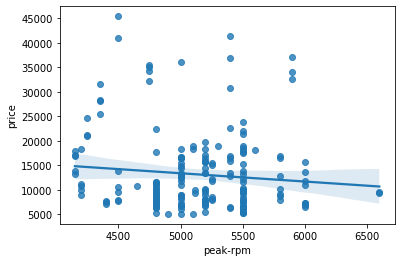

In [15]:
sns.regplot(x="peak-rpm", y="price", data=df)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.

We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616.

In [16]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


### Question 3 a): 
Find the correlation between x="stroke" and y="price".

In [17]:
df[['stroke','price']].corr() 

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


### Question 3 b):
Given the correlation results between "price" and "stroke", do you expect a linear relationship?

Verify your results using the function "regplot()".

<AxesSubplot:xlabel='stroke', ylabel='price'>

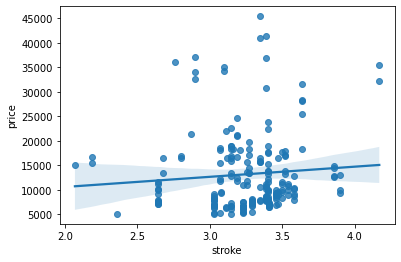

In [18]:
sns.regplot(x='stroke', y='price', data=df)

**Categorical Variables**

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

Let's look at the relationship between "body-style" and "price".

<AxesSubplot:xlabel='body-style', ylabel='price'>

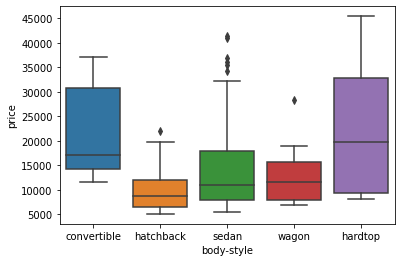

In [19]:
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price

Let's examine engine "engine-location" and "price":

<AxesSubplot:xlabel='engine-location', ylabel='price'>

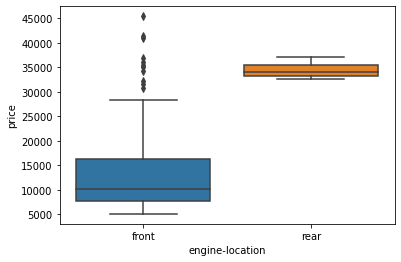

In [20]:
sns.boxplot(x="engine-location", y="price", data=df) 

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

Let's examine "drive-wheels" and "price".

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

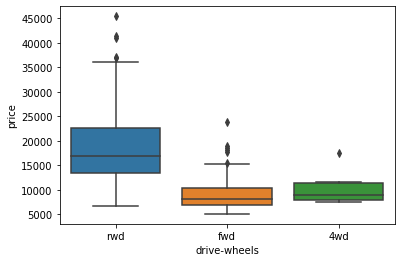

In [21]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

### Descriptive Statistical Analysis

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

* the count of that variable
* the mean
* the standard deviation (std)
* the minimum value
* the IQR (Interquartile Range: 25%, 50% and 75%)
* the maximum value